# Sentiment Analysis Pilpres 2024 Naive bayes classifier
M Fahd Ishamuddin
<br>
<br>

41155050180048
<hr>

In [1]:
%matplotlib inline

import re #regex
import string #string
import pandas as pd #dataframe
import numpy as np #array dan matematika lainnya
import matplotlib.pyplot as plt # data visualisasi
import seaborn as sns #data visualisasi
import collections
import nltk #natural language toolkit
from nltk.tokenize import word_tokenize #tokenisasi
from nltk.sentiment import SentimentIntensityAnalyzer #intensitas sentimen 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #stopword remover
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #stemming

In [2]:
data = pd.read_csv('2022sen.csv')
print('data ada sebanyak',len(data),'baris')
data = data.drop(['Unnamed: 0', 'id'], axis = 1)
print(data.columns)
print(data.dtypes)

data ada sebanyak 112844 baris
Index(['date', 'tweet', 'username'], dtype='object')
date        object
tweet       object
username    object
dtype: object


In [3]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 1993 data yang terduplikasi


In [4]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
97150,Saya dukung di pilpres 2024 ya pak @ridwankamil,40
34625,@rkij_sukabumi @ridwankamil Saya dukung di pil...,34
38024,AHY Minim Prestasi Tapi Nekad Maju Pilpres htt...,32
41674,Anis merupakan sosok yang tidak cocok untuk me...,29
1145,#Mangkrak.\nsiapa yang betah+doyan dikibulin d...,29
...,...,...
36973,@wawanjangkarmas @WagimanDeep212_ @jokowi Mash...,1
36972,@wawanalwan27 @TriSartopo @Mdy_Asmara1701 @ani...,1
36971,@wawan_purwandl @prabowo @cakimiNOW @gusyusufc...,1
36970,@wawan_purwandl @cakimiNOW Maju terus Gus Muha...,1


In [5]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 843 yang memiliki cuitan yang sama dengan total 1993 tweet


In [6]:
data = data.drop_duplicates(subset=['tweet'])

In [7]:
len(data)

110851

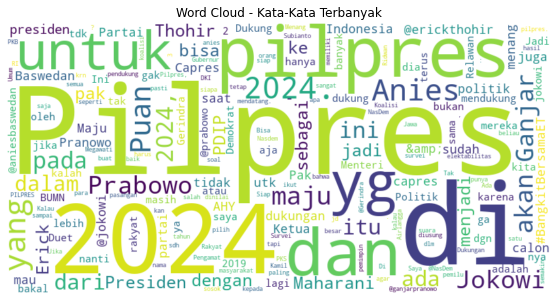

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = ' '.join(str(data['tweet']))
word_counts = data['tweet'].str.split(expand=True).stack().value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata-Kata Terbanyak')
plt.show()


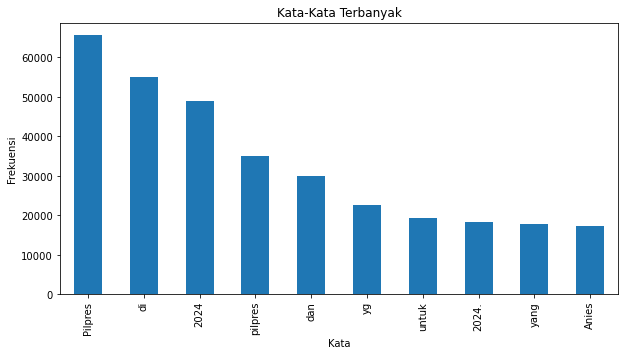

In [9]:
word_counts = data['tweet'].str.split(expand=True).stack().value_counts()
top_words = word_counts.head(10)  # Mengambil 10 kata teratas, ganti jumlah sesuai dengan kebutuhan Anda
plt.figure(figsize=(10, 5))
top_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-Kata Terbanyak')
plt.show()

# FILTERING
regex

In [10]:
def preprocess_tweet2(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower()  # convert to lower case
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = re.sub(r'\brt', '', tweet) #remove 'rt'
    tweet = re.sub(r'\.',' ', tweet) #
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    tweet = re.sub(r'\n+', '', tweet)
    return tweet
data['tweet']=data['tweet'].apply(preprocess_tweet2)


In [11]:
data = data.dropna()

In [12]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 14584 data yang terduplikasi


In [13]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
22626,ganjar dapat dukungan maju pilpres dari petan...,68
54479,nasdem bicara duet aniesahy di pilpres cocok ...,57
1315,ahy dinilai bisa jadi kunci kemenangan pilpres...,54
86439,survei pilpres asi prabowocak imin kalahkan g...,52
65351,pilpres,49
...,...,...
33362,jika pilpres nanti hanya akan muncul pasangan...,1
33361,jika pilpres jurdil tak seperti kala kardus be...,1
33360,jika pilpres hari ini maka anies hampir pasti ...,1
33359,jika pilpres hari ini ganjar pranowo menang te...,1


In [14]:
data = data.drop_duplicates(subset=['tweet'])

In [15]:
len(data)

96265

In [16]:
from nltk.tokenize import word_tokenize

def tokenize_column(text):
    if isinstance(text, str):  # Memastikan bahwa text adalah string
        return word_tokenize(text)
    else:
        return []  # Mengembalikan list kosong jika text bukan string

# Contoh penggunaan:
data['tweet'] = data['tweet'].apply(tokenize_column)

In [17]:
data.tweet.iloc[0]

['berkat',
 'kinerja',
 'di',
 'bumn',
 'serta',
 'kedekatan',
 'dengan',
 'pemerintah',
 'membuat',
 'elektabilitas',
 'terus',
 'meningkat',
 'atas',
 'dasar',
 'itu',
 'dinilai',
 'jadi',
 'cawapres',
 'terkuat',
 'di',
 'pilpres']

In [18]:
stemmer = StemmerFactory().create_stemmer()
def stemming(batch):
    # Menerapkan stemming pada setiap teks dalam batch
    stemmed_batch = [stemmer.stem(text) for text in batch]

    # Melakukan penghapusan stopwords pada setiap teks dalam batch

    return stemmed_batch

# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = data['tweet'].apply(stemming)

# Hasil preprocessing data
print(data)

                             date  \
0       2022-12-30 23:50:32+00:00   
1       2022-12-30 23:50:16+00:00   
2       2022-12-30 23:40:27+00:00   
3       2022-12-30 23:36:07+00:00   
4       2022-12-30 23:26:47+00:00   
...                           ...   
112839  2022-01-01 02:06:49+00:00   
112840  2022-01-01 01:55:42+00:00   
112841  2022-01-01 01:49:00+00:00   
112842  2022-01-01 00:38:55+00:00   
112843  2022-01-01 00:37:00+00:00   

                                                    tweet         username  
0       [berkat, kerja, di, bumn, serta, dekat, dengan...        Fuad_Lha9  
1       [gandeng, ulama, hingga, tokoh, agama, dalam, ...      iwan_tata98  
2       [mantap, elektabilitas, menteri, bumn, erick, ...        Lima8Satu  
3       [baru, lolos, bagai, serta, milu, partai, umma...  21BeritaTerkini  
4       [agenda, politik, negara, tuan, rumah, piala, ...      rezakaisar3  
...                                                   ...              ...  
112839  [aneh, n

In [19]:
data.tweet.iloc[0]

['berkat',
 'kerja',
 'di',
 'bumn',
 'serta',
 'dekat',
 'dengan',
 'perintah',
 'buat',
 'elektabilitas',
 'terus',
 'tingkat',
 'atas',
 'dasar',
 'itu',
 'nilai',
 'jadi',
 'cawapres',
 'kuat',
 'di',
 'pilpres']

In [20]:
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()
def stopword(batch):
    # Melakukan penghapusan stopwords pada setiap teks dalam batch
    cleaned_batch = [stopword_remover.remove(text) for text in batch]
    cleaned_batch = [text for text in cleaned_batch if all(word not in text.lower() for word in ['yg', 'dgn', 'kl','spt','pk','tp','krn','dr','utk','lg','gw','si','jg','jd','shg','sbg'])]

    return cleaned_batch


# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = data['tweet'].apply(stopword)

# Hasil preprocessing data
print(data)

                             date  \
0       2022-12-30 23:50:32+00:00   
1       2022-12-30 23:50:16+00:00   
2       2022-12-30 23:40:27+00:00   
3       2022-12-30 23:36:07+00:00   
4       2022-12-30 23:26:47+00:00   
...                           ...   
112839  2022-01-01 02:06:49+00:00   
112840  2022-01-01 01:55:42+00:00   
112841  2022-01-01 01:49:00+00:00   
112842  2022-01-01 00:38:55+00:00   
112843  2022-01-01 00:37:00+00:00   

                                                    tweet         username  
0       [berkat, , , bumn, , , , perintah, , elektabil...        Fuad_Lha9  
1       [gandeng, ulama, , tokoh, agama, , , suasana, ...      iwan_tata98  
2       [mantap, elektabilitas, menteri, bumn, erick, ...        Lima8Satu  
3       [, lolos, , , milu, partai, ummat, , bahas, , ...  21BeritaTerkini  
4       [agenda, politik, negara, tuan, rumah, piala, ...      rezakaisar3  
...                                                   ...              ...  
112839  [aneh, n

In [21]:
data.tweet.iloc[0]

['berkat',
 '',
 '',
 'bumn',
 '',
 '',
 '',
 'perintah',
 '',
 'elektabilitas',
 '',
 'tingkat',
 '',
 'dasar',
 '',
 'nilai',
 '',
 'cawapres',
 'kuat',
 '',
 'pilpres']

In [22]:
def to_text(daftar_token):
    tokens = [token for token in daftar_token if token != '']
    kalimat = ' '.join(tokens)
    return kalimat
data['tweet'] = data['tweet'].apply(to_text)

In [23]:
from nltk.tokenize import word_tokenize
def labelling(tweet):
    # tweet = preprocess_tweet(tweet)
    clean_tokens = word_tokenize(tweet) #tokenize
    # clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['tweet'].apply(labelling)

In [24]:
data.sentiment.value_counts()

Neutral     41355
Positive    36541
Negative    18369
Name: sentiment, dtype: int64

In [25]:
dat = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {dat} data yang terduplikasi')

ada sebanyak 3323 data yang terduplikasi


In [26]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
61571,pilpres,192
47387,menang pilpres,30
81787,survei aniesahy peluang pilpres demokrat pro ubah,25
18376,dukung maju pilpres,24
44746,maju pilpres,22
...,...,...
31333,jabat gub dki blm dipertanggungjawabkan blm ka...,1
31332,jabat golkar pan paksa wacana sandera pdip car...,1
31331,jabat gak tau malu masyarakat ragu aparat ting...,1
31330,jabat duga periode amandemen uud peluang parpo...,1


In [27]:
data = data.drop_duplicates(subset=['tweet'])

In [28]:
data = data.dropna()

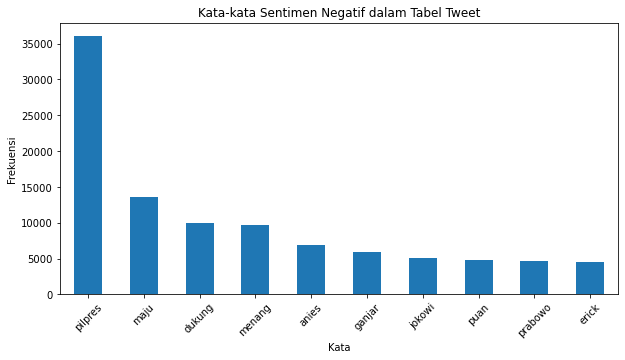

In [29]:
positif_word_counts = data[data['sentiment'] == 'Positive']['tweet'].str.split(expand=True).stack().value_counts()
top_pos_words = positif_word_counts.head(10)
plt.figure(figsize=(10, 5))
top_pos_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Sentimen Negatif dalam Tabel Tweet')
plt.xticks(rotation=45)
plt.show()

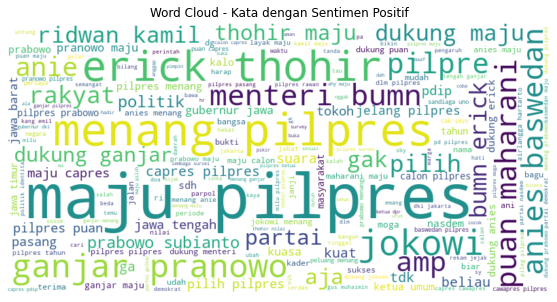

In [30]:
data_positif = data[data['sentiment'] == 'Positive']
all_words_positif = ' '.join(data_positif['tweet'])
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(all_words_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata dengan Sentimen Positif')
plt.show()

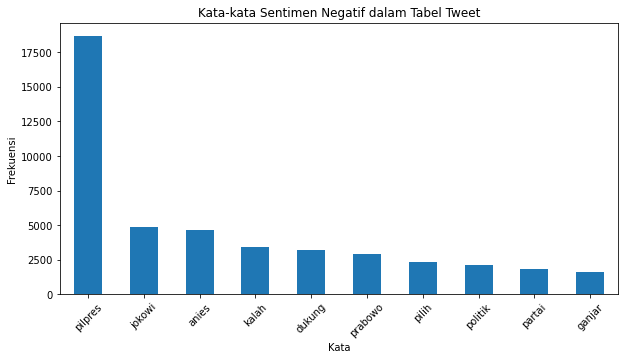

In [31]:
negatif_word_counts = data[data['sentiment'] == 'Negative']['tweet'].str.split(expand=True).stack().value_counts()
top_negatif_words = negatif_word_counts.head(10)
plt.figure(figsize=(10, 5))
top_negatif_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Sentimen Negatif dalam Tabel Tweet')
plt.xticks(rotation=45)
plt.show()

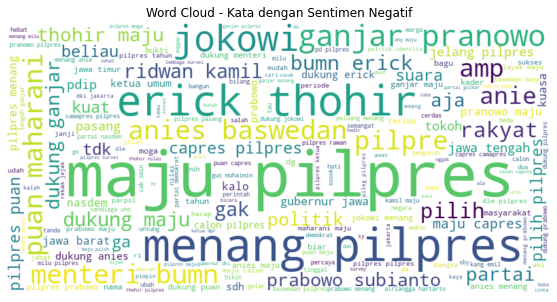

In [32]:
data_negatif = data[data['sentiment'] == 'Negative']
all_words_neg = ' '.join(data_negatif['tweet'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(all_words_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata dengan Sentimen Negatif')
plt.show()

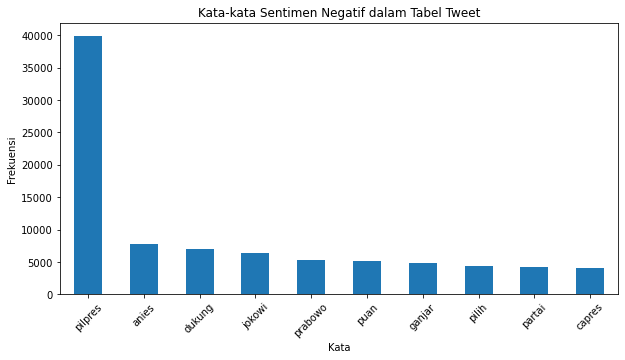

In [33]:
netral_word_counts = data[data['sentiment'] == 'Neutral']['tweet'].str.split(expand=True).stack().value_counts()
top_net_words = netral_word_counts.head(10)
plt.figure(figsize=(10, 5))
top_net_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Sentimen Negatif dalam Tabel Tweet')
plt.xticks(rotation=45)
plt.show()

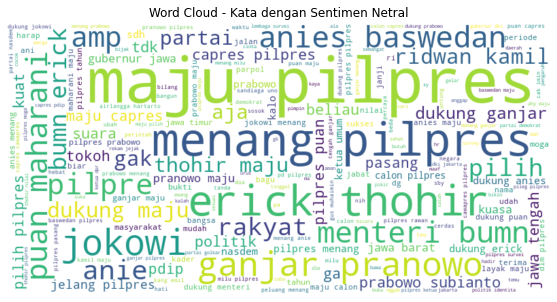

In [34]:
data_netral = data[data['sentiment'] == 'Neutral']
all_words_net = ' '.join(data_negatif['tweet'])
wordcloud_net = WordCloud(width=800, height=400, background_color='white').generate(all_words_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_net, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata dengan Sentimen Netral')
plt.show()

In [35]:
data.isnull().sum()

date         0
tweet        0
username     0
sentiment    0
dtype: int64

epoch: 1 acc: 0.7139706277906289
epoch: 2 acc: 0.7136478562590779
epoch: 3 acc: 0.707353811393835
epoch: 4 acc: 0.7178976814244984


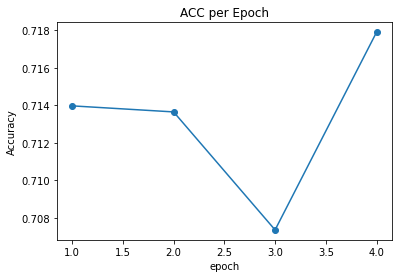

Akurasi: 71.79%


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

# Melakukan transformasi teks menjadi vektor fitur
X = vectorizer.fit_transform(data['tweet'].astype(str))
# Y = vectorizer.fit_transform(data['sentiment'])

epoch = 4
accuracy_values = np.zeros(epoch)
# Membagi data menjadi data latih dan data uji
for epochs in range(epoch):
    X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=None)
    naive_bayes = MultinomialNB()
    training = naive_bayes.fit(X_train, y_train)
    prediction =  naive_bayes.predict(X_test)

    accuracy = accuracy_score(y_test, prediction)
    accuracy_values[epochs] = accuracy

    print("epoch:", epochs + 1, "acc:", accuracy)
plt.plot(range(1,epoch + 1), accuracy_values, marker='o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('ACC per Epoch')
plt.show()



y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# MCCV

Iterasi 1: 0.7096670073699499
Iterasi 2: 0.7116036365592555
Iterasi 3: 0.7117112270697724
Iterasi 4: 0.7137016515143364
Iterasi 5: 0.7157458712141589
Iterasi 6: 0.7106353219646028
Iterasi 7: 0.7182742482113078
Iterasi 8: 0.7128947226854592
Iterasi 9: 0.71144225079348
Iterasi 10: 0.7106353219646028
Iterasi 11: 0.7113884555382215
Iterasi 12: 0.7140244230458873
Iterasi 13: 0.7124105653881327
Iterasi 14: 0.7091290548173651
Iterasi 15: 0.71499273764054
Iterasi 16: 0.707353811393835
Iterasi 17: 0.711549841303997
Iterasi 18: 0.7174673193824305
Iterasi 19: 0.7158534617246759
Iterasi 20: 0.7080531497121954
Iterasi 21: 0.7138630372801119
Iterasi 22: 0.7123567701328742
Iterasi 23: 0.709559416859433
Iterasi 24: 0.7119802033460648
Iterasi 25: 0.7142396040669213
Iterasi 26: 0.7113884555382215
Iterasi 27: 0.7127333369196837
Iterasi 28: 0.7100973694120178
Iterasi 29: 0.7116036365592555
Iterasi 30: 0.7137016515143364
Iterasi 31: 0.711334660282963
Iterasi 32: 0.7085373070095218
Iterasi 33: 0.71257195115

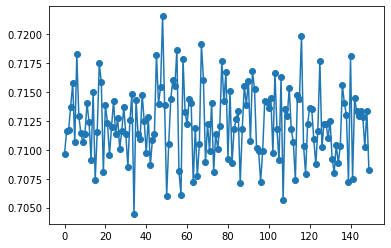

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=150, test_size=0.2, random_state=33)

# Melakukan cross-validation dengan ShuffleSplit
scores = cross_val_score(naive_bayes, X, data['sentiment'], cv=shuffle_split, scoring='accuracy')
x = []
# Menampilkan skor akurasi untuk setiap iterasi cross-validation
for i, score in enumerate(scores):
    print(f"Iterasi {i+1}: {score}")
    x.append(score)

# Menampilkan rata-rata skor akurasi dari cross-validation
print(len(x))
print("Rata-rata skor akurasi: {:.2f} %".format(scores.mean()*100))
print("Skor tertinggi: {:.2f} %".format(scores.max()*100))
plt.plot(range(len(x)), x, marker='o')

In [38]:
acc_mnb = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, y_pred))

Accuracy: 0.7179
Confusion matrix:
 [[2471 1014   97]
 [1277 5473 1351]
 [ 525  980 5401]]
              precision    recall  f1-score   support

    Negative       0.58      0.69      0.63      3582
     Neutral       0.73      0.68      0.70      8101
    Positive       0.79      0.78      0.79      6906

    accuracy                           0.72     18589
   macro avg       0.70      0.72      0.71     18589
weighted avg       0.72      0.72      0.72     18589



[[2471 1014   97]
 [1277 5473 1351]
 [ 525  980 5401]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


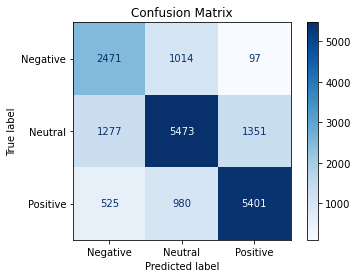

In [39]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[10748  3418   389]
 [ 3326 23850  4375]
 [ 1658  2899 23690]]


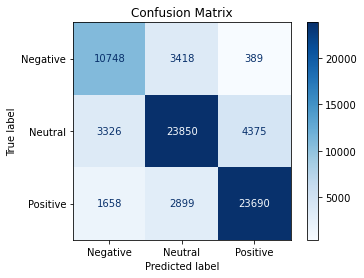

In [40]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_train, y_train,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:{:.2f}%".format(accuracy * 100))

# Menghitung dan menampilkan presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung dan menampilkan recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall * 100))

# Menghitung dan menampilkan F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f1 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:71.79%
Presisi: 72.38%
Recall:71.79%
F1-score:71.94%
Persentase Klasifikasi:
Positif: 36.8%
Negatif: 23.0%
Netral: 40.2%


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_train)

# Menghitung dan menampilkan akurasi
accuracy1 = accuracy_score(y_train, y_pred)
print("Akurasi:{:.2f}%".format(accuracy1 * 100))

# Menghitung dan menampilkan presisi
precision1 = precision_score(y_train, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision1 * 100))

# Menghitung dan menampilkan recall
recall1 = recall_score(y_train, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall1 * 100))

# Menghitung dan menampilkan F1-score
f11 = f1_score(y_train, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f11 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:78.39%
Presisi: 78.55%
Recall:78.39%
F1-score:78.43%
Persentase Klasifikasi:
Positif: 38.3%
Negatif: 21.2%
Netral: 40.6%


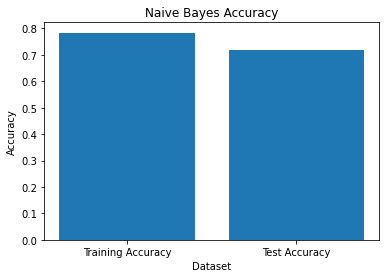

0.06603840723365928
0.7839360886581577
0.7178976814244984


In [43]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Memprediksi label pada data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung akurasi pada data latih dan data uji
akurasi_train = accuracy_score(y_train, y_train_pred)
akurasi_test = accuracy_score(y_test, y_test_pred)

# Membuat grafik akurasi
labels = ['Training Accuracy', 'Test Accuracy']
values = [akurasi_train, akurasi_test]

plt.bar(labels, values)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()

print(akurasi_train - akurasi_test)
print(akurasi_train)
print(akurasi_test)

[0.17777384 0.13945191 0.1193168  0.10619794 0.10217895 0.09562153
 0.09102921 0.08632073 0.08175739 0.07866401]


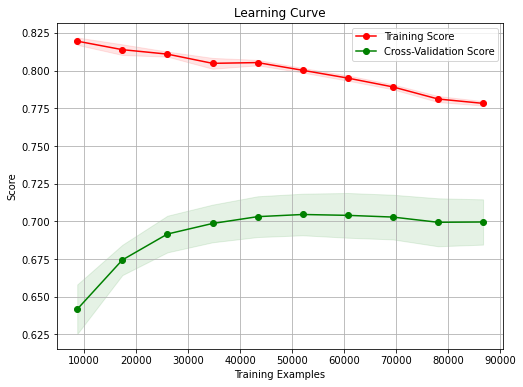

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=15, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    print(train_scores_mean - test_scores_mean)
    plt.legend(loc='best')
    plt.show()

# Contoh penggunaan
estimator = MultinomialNB()
plot_learning_curve(estimator, X, data['sentiment'])


In [45]:
data.tweet.iloc[0]

'berkat bumn perintah elektabilitas tingkat dasar nilai cawapres kuat pilpres'

In [46]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    pred = naive_bayes.predict(X_input)
    positive_count = (y_pred == 'Positive').sum()
    negative_count = (y_pred == 'Negative').sum()
    neutral_count = (y_pred == 'Neutral').sum()
    na = training.predict_proba(X_input)
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", pred[0], na)
    print()

Hasil Prediksi:  Neutral [[0.19575538 0.42434065 0.37990397]]

